In [1]:
%pylab inline
import numpy as np
from conway99 import *

Populating the interactive namespace from numpy and matplotlib


# A representative seed graph
We start from an arbitrary vertex and its neighbours. These can necessarily be arranged as 7 blades of a fan; we fix a numbering with vertex 0 the centre, 1-14 its neighbours, and blade edges 1-2, 3-4, 5-6, 7-8, 9-10, 11-12, 13-14

In [2]:
seed15 = np.empty((15,15), dtype='int')
for i in range(15):
    for j in range(15):
        seed15[i,j] = 0

# 1-14 all nhbrs of 0
for i in range(1,15):
    seed15[0,i] = 1
    seed15[i,0] =1
    
# By fixing an ordering, a single representative suffices
for i in [1,3,5,7,9,11,13]:
    seed15[i,i+1] = 1
    seed15[i+1,i] = 1

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


C:\Users\Graeme\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


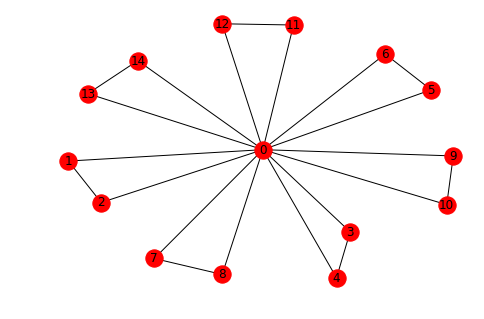

In [3]:
# review
print(seed15)
plot_given_edges(seed15)

In [4]:
# Verify some details
assert len(seed15)*len(seed15) == num_known_zeros(seed15) + num_known_ones(seed15) + num_unknowns(seed15)
assert not(has_unknown_values(seed15))
assert lambda_compatible(seed15)
assert mu_compatible(seed15)
assert meets_adjacency_requirements(seed15, debug=True)
assert graph_is_valid(seed15)

# Adding vertex 15
(NB, as we started numbering at 0, this is our 16th vertex)

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0]]


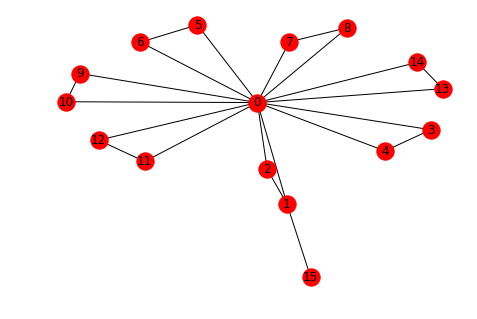

In [5]:
# Generate template with an additional vertex, and review
seed16 = get_supermatrix_template(seed15)
print(seed16)
plot_given_edges(seed16)

In [6]:
# Fill in the template
%time super16 = templates_to_valid_graphs([seed16], verbose=2)

Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Adding branch 1 candidate
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 2 candidates
Branch 0 yielded compatible graph
Branch 1 inv

In [7]:
# Reduce to eliminate equivalent graphs
rep16 = reduce_mod_equivalence(super16, verbose=True)

	12 candidates, 0 representatives
	0 candidates, 1 representatives


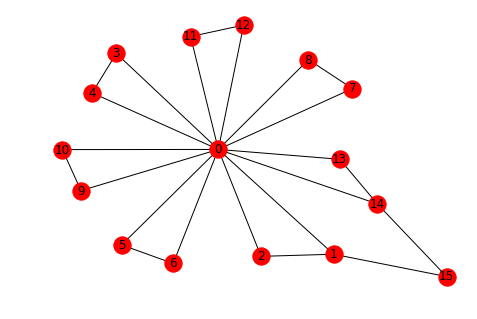

In [8]:
# Turns out, there's only really one way to extend this! Let's take a look
plot_given_edges(rep16[0])

This was expected:

By mu=2 condition, as 15 is not a nhbr of 0, they have 2 mutual nhbrs
 * As the nhbrs of 0 are 1-14, 15 nhbrs two of these.
 * We assumed 1-15 already; this prevents 2-15 (else 1,2 are nhbrs with two mutual nhbrs - 0, 15 - violating lambda=1) 
 * So 15 nhbrs precisely 1 of vertices 3-14, and these 12 choices are equivalent
 * So to fix notation we can force this nhbr to be vertex 14
 
Moreover, we could have applied this at the template stage to reduce the search space.

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 1 0]]


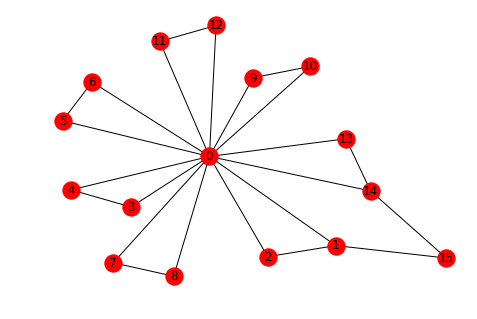

In [9]:
# alternative template 
seed16 = get_supermatrix_template(seed15, forced_edge=(15,14))
print(seed16)
plot_given_edges(seed16)

In [10]:
# Fill in the template
%time super16 = templates_to_valid_graphs([seed16], verbose=2)

Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Adding branch 0 candidate
Branch 1 invalid
Currently 0 graphs, 1 candidates
Branch 0 yielded compatible graph
Branch 1 invalid
Reduces to 1 valid graphs
Wall time: 13 ms


In [11]:
# For convenience, can wrap up the templating, search, and reduction steps for a list of seed graphs
%time rep16 = find_valid_supergraphs([seed15], forced_edge=(15,14))

2020-04-28 12:21:28.536951: 1 seed templates generated
2020-04-28 12:21:28.548917: 1 valid graphs from templates
	1 candidates, 0 representatives
	0 candidates, 1 representatives
2020-04-28 12:21:28.548917: Reduced to 1  representatives
Wall time: 12 ms


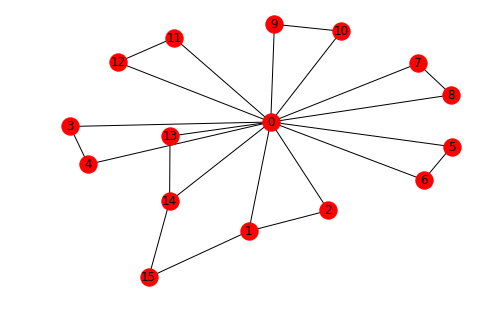

In [12]:
# confirm this is what we expected from the individual steps:
plot_given_edges(rep16[0])

# Saturating vertex 1

We know one of the blades centred at vertex 1; namely 1-0-2-1.

We also have part of another, containing vertex 15.

wlog, let vertex 16 be the other vertex of that blade (_we already force 1-16, so suffices to set 15-16_)

In [13]:
%time rep17 = find_valid_supergraphs(rep16, forced_edge=(15,16))

2020-04-28 12:21:28.641669: 1 seed templates generated
2020-04-28 12:21:28.745424: 11 valid graphs from templates
	11 candidates, 0 representatives
	10 candidates, 1 representatives
	0 candidates, 2 representatives
2020-04-28 12:21:28.748417: Reduced to 2  representatives
Wall time: 107 ms


Vertex 17 necessarily starts a new blade, so no forcing

In [14]:
%time rep18 = find_valid_supergraphs(rep17)

2020-04-28 12:21:28.754368: 2 seed templates generated
2020-04-28 12:21:29.045627: 20 valid graphs from templates
	20 candidates, 0 representatives
	10 candidates, 1 representatives
	8 candidates, 2 representatives
	0 candidates, 3 representatives
2020-04-28 12:21:29.052611: Reduced to 3  representatives
Wall time: 298 ms


However, we can then force vertex 18 to be the other vertex of that blade

In [15]:
%time rep19 = find_valid_supergraphs(rep18, forced_edge=(17,18))

2020-04-28 12:21:29.057557: 3 seed templates generated
2020-04-28 12:21:29.517360: 27 valid graphs from templates
	27 candidates, 0 representatives
	26 candidates, 1 representatives
	17 candidates, 2 representatives
	16 candidates, 3 representatives
	6 candidates, 4 representatives
	0 candidates, 5 representatives
2020-04-28 12:21:29.532320: Reduced to 5  representatives
Wall time: 475 ms


Continue in this fashion until we have all nhbrs of vertex 1, with forced fan pattern 0-2, 15-16, 17-18, 19-20, 21-22, 23-24, 25-26

In [16]:
%time rep20 = find_valid_supergraphs(rep19)

2020-04-28 12:21:29.538314: 5 seed templates generated
2020-04-28 12:21:30.481779: 40 valid graphs from templates
	40 candidates, 0 representatives
	32 candidates, 1 representatives
	30 candidates, 2 representatives
	24 candidates, 3 representatives
	16 candidates, 4 representatives
	14 candidates, 5 representatives
	8 candidates, 6 representatives
	4 candidates, 7 representatives
	0 candidates, 8 representatives
2020-04-28 12:21:30.509711: Reduced to 8  representatives
Wall time: 972 ms


In [17]:
%time rep21 = find_valid_supergraphs(rep20, forced_edge=(19,20))

2020-04-28 12:21:30.515695: 8 seed templates generated
2020-04-28 12:21:32.080505: 56 valid graphs from templates
	56 candidates, 0 representatives
	55 candidates, 1 representatives
	48 candidates, 2 representatives
	46 candidates, 3 representatives
	37 candidates, 4 representatives
	32 candidates, 5 representatives
	25 candidates, 6 representatives
	24 candidates, 7 representatives
	14 candidates, 8 representatives
	2 candidates, 9 representatives
	0 candidates, 10 representatives
2020-04-28 12:21:32.140352: Reduced to 10  representatives
Wall time: 1.63 s


In [18]:
%time rep22 = find_valid_supergraphs(rep21)

2020-04-28 12:21:32.145332: 10 seed templates generated
2020-04-28 12:21:34.310566: 60 valid graphs from templates
	60 candidates, 0 representatives
	54 candidates, 1 representatives
	52 candidates, 2 representatives
	48 candidates, 3 representatives
	42 candidates, 4 representatives
	40 candidates, 5 representatives
	36 candidates, 6 representatives
	32 candidates, 7 representatives
	30 candidates, 8 representatives
	28 candidates, 9 representatives
	24 candidates, 10 representatives
	18 candidates, 11 representatives
	16 candidates, 12 representatives
	12 candidates, 13 representatives
	10 candidates, 14 representatives
	8 candidates, 15 representatives
	6 candidates, 16 representatives
	0 candidates, 17 representatives
2020-04-28 12:21:34.397277: Reduced to 17  representatives
Wall time: 2.25 s


In [19]:
%time rep23 = find_valid_supergraphs(rep22, forced_edge=(21,22))

2020-04-28 12:21:34.403295: 17 seed templates generated
2020-04-28 12:21:38.022698: 85 valid graphs from templates
	85 candidates, 0 representatives
	84 candidates, 1 representatives
	79 candidates, 2 representatives
	77 candidates, 3 representatives
	70 candidates, 4 representatives
	67 candidates, 5 representatives
	61 candidates, 6 representatives
	59 candidates, 7 representatives
	50 candidates, 8 representatives
	41 candidates, 9 representatives
	40 candidates, 10 representatives
	33 candidates, 11 representatives
	30 candidates, 12 representatives
	25 candidates, 13 representatives
	24 candidates, 14 representatives
	14 candidates, 15 representatives
	4 candidates, 16 representatives
	0 candidates, 17 representatives
2020-04-28 12:21:38.171304: Reduced to 17  representatives
Wall time: 3.77 s


In [20]:
%time rep24 = find_valid_supergraphs(rep23)

2020-04-28 12:21:38.178283: 17 seed templates generated
2020-04-28 12:21:42.055880: 68 valid graphs from templates
	68 candidates, 0 representatives
	64 candidates, 1 representatives
	62 candidates, 2 representatives
	60 candidates, 3 representatives
	56 candidates, 4 representatives
	54 candidates, 5 representatives
	52 candidates, 6 representatives
	48 candidates, 7 representatives
	46 candidates, 8 representatives
	44 candidates, 9 representatives
	40 candidates, 10 representatives
	38 candidates, 11 representatives
	36 candidates, 12 representatives
	34 candidates, 13 representatives
	32 candidates, 14 representatives
	28 candidates, 15 representatives
	26 candidates, 16 representatives
	24 candidates, 17 representatives
	20 candidates, 18 representatives
	18 candidates, 19 representatives
	16 candidates, 20 representatives
	12 candidates, 21 representatives
	10 candidates, 22 representatives
	8 candidates, 23 representatives
	6 candidates, 24 representatives
	4 candidates, 25 repr

In [21]:
%time rep25 = find_valid_supergraphs(rep24, forced_edge=(23,24))

2020-04-28 12:21:42.228452: 26 seed templates generated
2020-04-28 12:21:47.607066: 78 valid graphs from templates
	78 candidates, 0 representatives
	77 candidates, 1 representatives
	74 candidates, 2 representatives
	72 candidates, 3 representatives
	67 candidates, 4 representatives
	63 candidates, 5 representatives
	61 candidates, 6 representatives
	54 candidates, 7 representatives
	52 candidates, 8 representatives
	46 candidates, 9 representatives
	42 candidates, 10 representatives
	40 candidates, 11 representatives
	31 candidates, 12 representatives
	28 candidates, 13 representatives
	26 candidates, 14 representatives
	19 candidates, 15 representatives
	14 candidates, 16 representatives
	11 candidates, 17 representatives
	10 candidates, 18 representatives
	0 candidates, 19 representatives
2020-04-28 12:21:47.768642: Reduced to 19  representatives
Wall time: 5.54 s


In [22]:
%time rep26 = find_valid_supergraphs(rep25)

2020-04-28 12:21:47.776616: 19 seed templates generated
2020-04-28 12:21:51.506639: 38 valid graphs from templates
	38 candidates, 0 representatives
	36 candidates, 1 representatives
	34 candidates, 2 representatives
	32 candidates, 3 representatives
	30 candidates, 4 representatives
	28 candidates, 5 representatives
	26 candidates, 6 representatives
	24 candidates, 7 representatives
	22 candidates, 8 representatives
	20 candidates, 9 representatives
	18 candidates, 10 representatives
	16 candidates, 11 representatives
	14 candidates, 12 representatives
	12 candidates, 13 representatives
	10 candidates, 14 representatives
	8 candidates, 15 representatives
	6 candidates, 16 representatives
	4 candidates, 17 representatives
	2 candidates, 18 representatives
	0 candidates, 19 representatives
2020-04-28 12:21:51.579446: Reduced to 19  representatives
Wall time: 3.81 s


In [23]:
%time rep27 = find_valid_supergraphs(rep26, forced_edge=(25,26))

2020-04-28 12:21:51.588391: 19 seed templates generated
2020-04-28 12:21:54.429816: 19 valid graphs from templates
	19 candidates, 0 representatives
	18 candidates, 1 representatives
	16 candidates, 2 representatives
	14 candidates, 3 representatives
	12 candidates, 4 representatives
	10 candidates, 5 representatives
	7 candidates, 6 representatives
	5 candidates, 7 representatives
	4 candidates, 8 representatives
	2 candidates, 9 representatives
	1 candidates, 10 representatives
	0 candidates, 11 representatives
2020-04-28 12:21:54.453757: Reduced to 11  representatives
Wall time: 2.87 s


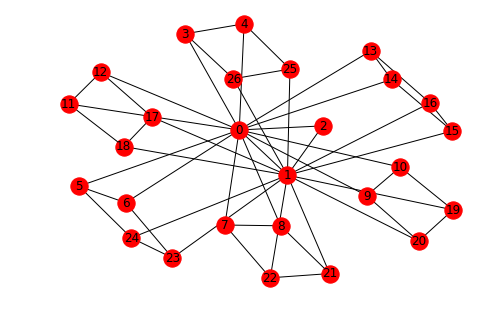

In [24]:
# Review an example

plot_given_edges(rep27[0])

# Saturating vertex 2

Although we have multiple possible 27-vertex graphs, for each of them we know that vertex 2 has degree 2: 
 * As a neighbour of vertex 0, it can only have one mutual neighbour amongst vertices 1,3-14, which is vertex 1
 * As a neighbour of vertex 1, it can only have one mutual neighbour amongst vertices 0,15-26, which is vertex 0
    
Thus we have precisely one blade centered at vertex 2, 2-0-1-2. 

We require 6 more, and may arrange them to ensure blade edges 27-28, 29-30, 31-32, 33-34, 35-36, 37-38.

In [25]:
# Confirm our claim:
[vertex_degrees(a)[2] for a in rep27]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [26]:
# Begin to saturate
%time rep28 = find_valid_supergraphs(rep27)

2020-04-28 12:45:23.780887: 11 seed templates generated
2020-04-28 12:46:20.292737: 1546 valid graphs from templates
	1546 candidates, 0 representatives
	1426 candidates, 1 representatives
	1414 candidates, 2 representatives
	1350 candidates, 3 representatives
	1302 candidates, 4 representatives
	1294 candidates, 5 representatives
	1290 candidates, 6 representatives
	1282 candidates, 7 representatives
	1278 candidates, 8 representatives
	1206 candidates, 9 representatives
	1182 candidates, 10 representatives
	1176 candidates, 11 representatives
	1170 candidates, 12 representatives
	1164 candidates, 13 representatives
	1158 candidates, 14 representatives
	1146 candidates, 15 representatives
	1140 candidates, 16 representatives
	1076 candidates, 17 representatives
	1068 candidates, 18 representatives
	1064 candidates, 19 representatives
	1032 candidates, 20 representatives
	1024 candidates, 21 representatives
	1008 candidates, 22 representatives
	1000 candidates, 23 representatives
	936 

In [27]:
%time rep29 = find_valid_supergraphs(rep28, forced_edge=(27,28))

2020-04-28 12:47:40.081266: 83 seed templates generated
2020-04-28 12:54:25.198750: 9627 valid graphs from templates
	9627 candidates, 0 representatives
	9626 candidates, 1 representatives
	9610 candidates, 2 representatives
	9588 candidates, 3 representatives
	9540 candidates, 4 representatives
	9452 candidates, 5 representatives
	9436 candidates, 6 representatives
	9420 candidates, 7 representatives
	9419 candidates, 8 representatives
	9417 candidates, 9 representatives
	9416 candidates, 10 representatives
	9415 candidates, 11 representatives
	9405 candidates, 12 representatives
	9404 candidates, 13 representatives
	9403 candidates, 14 representatives
	9402 candidates, 15 representatives
	9388 candidates, 16 representatives
	9379 candidates, 17 representatives
	9373 candidates, 18 representatives
	9367 candidates, 19 representatives
	9361 candidates, 20 representatives
	9305 candidates, 21 representatives
	9251 candidates, 22 representatives
	9237 candidates, 23 representatives
	9223

	7667 candidates, 216 representatives
	7631 candidates, 217 representatives
	7611 candidates, 218 representatives
	7591 candidates, 219 representatives
	7555 candidates, 220 representatives
	7547 candidates, 221 representatives
	7543 candidates, 222 representatives
	7539 candidates, 223 representatives
	7534 candidates, 224 representatives
	7529 candidates, 225 representatives
	7520 candidates, 226 representatives
	7508 candidates, 227 representatives
	7506 candidates, 228 representatives
	7505 candidates, 229 representatives
	7504 candidates, 230 representatives
	7495 candidates, 231 representatives
	7486 candidates, 232 representatives
	7481 candidates, 233 representatives
	7469 candidates, 234 representatives
	7465 candidates, 235 representatives
	7463 candidates, 236 representatives
	7461 candidates, 237 representatives
	7452 candidates, 238 representatives
	7443 candidates, 239 representatives
	7438 candidates, 240 representatives
	7426 candidates, 241 representatives
	7421 candid

	6209 candidates, 432 representatives
	6206 candidates, 433 representatives
	6203 candidates, 434 representatives
	6199 candidates, 435 representatives
	6197 candidates, 436 representatives
	6195 candidates, 437 representatives
	6192 candidates, 438 representatives
	6190 candidates, 439 representatives
	6187 candidates, 440 representatives
	6186 candidates, 441 representatives
	6185 candidates, 442 representatives
	6184 candidates, 443 representatives
	6182 candidates, 444 representatives
	6179 candidates, 445 representatives
	6176 candidates, 446 representatives
	6175 candidates, 447 representatives
	6172 candidates, 448 representatives
	6170 candidates, 449 representatives
	6169 candidates, 450 representatives
	6166 candidates, 451 representatives
	6163 candidates, 452 representatives
	6161 candidates, 453 representatives
	6158 candidates, 454 representatives
	6156 candidates, 455 representatives
	6153 candidates, 456 representatives
	6151 candidates, 457 representatives
	6149 candid

	5223 candidates, 648 representatives
	5210 candidates, 649 representatives
	5203 candidates, 650 representatives
	5202 candidates, 651 representatives
	5201 candidates, 652 representatives
	5199 candidates, 653 representatives
	5198 candidates, 654 representatives
	5185 candidates, 655 representatives
	5178 candidates, 656 representatives
	5171 candidates, 657 representatives
	5158 candidates, 658 representatives
	5149 candidates, 659 representatives
	5140 candidates, 660 representatives
	5135 candidates, 661 representatives
	5130 candidates, 662 representatives
	5121 candidates, 663 representatives
	5120 candidates, 664 representatives
	5118 candidates, 665 representatives
	5117 candidates, 666 representatives
	5108 candidates, 667 representatives
	5103 candidates, 668 representatives
	5094 candidates, 669 representatives
	5085 candidates, 670 representatives
	5080 candidates, 671 representatives
	5079 candidates, 672 representatives
	5077 candidates, 673 representatives
	5076 candid

	4265 candidates, 864 representatives
	4262 candidates, 865 representatives
	4257 candidates, 866 representatives
	4252 candidates, 867 representatives
	4247 candidates, 868 representatives
	4244 candidates, 869 representatives
	4239 candidates, 870 representatives
	4237 candidates, 871 representatives
	4235 candidates, 872 representatives
	4230 candidates, 873 representatives
	4225 candidates, 874 representatives
	4222 candidates, 875 representatives
	4219 candidates, 876 representatives
	4214 candidates, 877 representatives
	4209 candidates, 878 representatives
	4206 candidates, 879 representatives
	4201 candidates, 880 representatives
	4196 candidates, 881 representatives
	4193 candidates, 882 representatives
	4188 candidates, 883 representatives
	4183 candidates, 884 representatives
	4180 candidates, 885 representatives
	4177 candidates, 886 representatives
	4172 candidates, 887 representatives
	4167 candidates, 888 representatives
	4162 candidates, 889 representatives
	4161 candid

	3548 candidates, 1078 representatives
	3544 candidates, 1079 representatives
	3541 candidates, 1080 representatives
	3537 candidates, 1081 representatives
	3534 candidates, 1082 representatives
	3533 candidates, 1083 representatives
	3530 candidates, 1084 representatives
	3526 candidates, 1085 representatives
	3523 candidates, 1086 representatives
	3519 candidates, 1087 representatives
	3517 candidates, 1088 representatives
	3515 candidates, 1089 representatives
	3512 candidates, 1090 representatives
	3510 candidates, 1091 representatives
	3508 candidates, 1092 representatives
	3506 candidates, 1093 representatives
	3504 candidates, 1094 representatives
	3501 candidates, 1095 representatives
	3497 candidates, 1096 representatives
	3494 candidates, 1097 representatives
	3491 candidates, 1098 representatives
	3487 candidates, 1099 representatives
	3484 candidates, 1100 representatives
	3482 candidates, 1101 representatives
	3481 candidates, 1102 representatives
	3478 candidates, 1103 re

	2360 candidates, 1289 representatives
	2358 candidates, 1290 representatives
	2356 candidates, 1291 representatives
	2354 candidates, 1292 representatives
	2351 candidates, 1293 representatives
	2350 candidates, 1294 representatives
	2338 candidates, 1295 representatives
	2318 candidates, 1296 representatives
	2306 candidates, 1297 representatives
	2294 candidates, 1298 representatives
	2274 candidates, 1299 representatives
	2262 candidates, 1300 representatives
	2261 candidates, 1301 representatives
	2258 candidates, 1302 representatives
	2257 candidates, 1303 representatives
	2254 candidates, 1304 representatives
	2253 candidates, 1305 representatives
	2237 candidates, 1306 representatives
	2225 candidates, 1307 representatives
	2213 candidates, 1308 representatives
	2197 candidates, 1309 representatives
	2181 candidates, 1310 representatives
	2169 candidates, 1311 representatives
	2157 candidates, 1312 representatives
	2141 candidates, 1313 representatives
	2139 candidates, 1314 re

	1334 candidates, 1500 representatives
	1332 candidates, 1501 representatives
	1329 candidates, 1502 representatives
	1325 candidates, 1503 representatives
	1321 candidates, 1504 representatives
	1320 candidates, 1505 representatives
	1314 candidates, 1506 representatives
	1302 candidates, 1507 representatives
	1290 candidates, 1508 representatives
	1272 candidates, 1509 representatives
	1260 candidates, 1510 representatives
	1259 candidates, 1511 representatives
	1256 candidates, 1512 representatives
	1252 candidates, 1513 representatives
	1248 candidates, 1514 representatives
	1246 candidates, 1515 representatives
	1244 candidates, 1516 representatives
	1241 candidates, 1517 representatives
	1239 candidates, 1518 representatives
	1237 candidates, 1519 representatives
	1235 candidates, 1520 representatives
	1232 candidates, 1521 representatives
	1230 candidates, 1522 representatives
	1224 candidates, 1523 representatives
	1212 candidates, 1524 representatives
	1194 candidates, 1525 re

	645 candidates, 1714 representatives
	642 candidates, 1715 representatives
	641 candidates, 1716 representatives
	638 candidates, 1717 representatives
	636 candidates, 1718 representatives
	633 candidates, 1719 representatives
	630 candidates, 1720 representatives
	628 candidates, 1721 representatives
	626 candidates, 1722 representatives
	623 candidates, 1723 representatives
	620 candidates, 1724 representatives
	619 candidates, 1725 representatives
	617 candidates, 1726 representatives
	614 candidates, 1727 representatives
	610 candidates, 1728 representatives
	606 candidates, 1729 representatives
	603 candidates, 1730 representatives
	600 candidates, 1731 representatives
	596 candidates, 1732 representatives
	592 candidates, 1733 representatives
	590 candidates, 1734 representatives
	588 candidates, 1735 representatives
	585 candidates, 1736 representatives
	582 candidates, 1737 representatives
	578 candidates, 1738 representatives
	574 candidates, 1739 representatives
	571 candida

	25 candidates, 1947 representatives
	24 candidates, 1948 representatives
	21 candidates, 1949 representatives
	20 candidates, 1950 representatives
	19 candidates, 1951 representatives
	16 candidates, 1952 representatives
	15 candidates, 1953 representatives
	12 candidates, 1954 representatives
	11 candidates, 1955 representatives
	9 candidates, 1956 representatives
	7 candidates, 1957 representatives
	5 candidates, 1958 representatives
	3 candidates, 1959 representatives
	1 candidates, 1960 representatives
	0 candidates, 1961 representatives
2020-04-28 13:21:00.434489: Reduced to 1961  representatives
Wall time: 33min 20s
